In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("task_data_200.csv")

# Preview
df.head()

,Task_ID,Description,Deadline,Assigned_To,Priority,Completed
0,1,Integrate payment gateway,2025-07-15,Aanya,High,No
1,2,Integrate payment gateway,2025-07-15,Raj,Medium,Yes
2,3,Design admin dashboard UI,2025-07-17,Ira,High,Yes
3,4,Implement caching for API,2025-07-16,Vikas,Medium,No
4,5,Add multi-language support,2025-07-08,Shreya,Medium,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Task_ID      200 non-null    int64 
 1   Description  200 non-null    object
 2   Deadline     200 non-null    object
 3   Assigned_To  200 non-null    object
 4   Priority     200 non-null    object
 5   Completed    200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB
None
Priority
Medium    99
High      54
Low       47
Name: count, dtype: int64
Completed
No     135
Yes     65
Name: count, dtype: int64
Assigned_To
Jaya      8
Raj       7
Swathi    7
Deepak    7
Prisha    7
Pavan     7
Nikhil    7
Sneha     7
Shreya    6
Harsha    6
Name: count, dtype: int64


/tmp/ipython-input-2-3262336010.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Priority', data=df, palette='viridis')


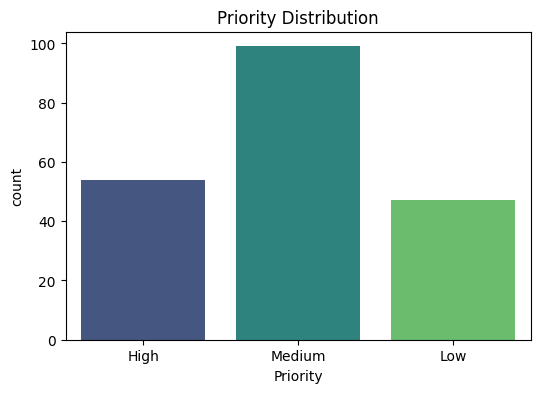

/tmp/ipython-input-2-3262336010.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Completed', data=df, palette='coolwarm')


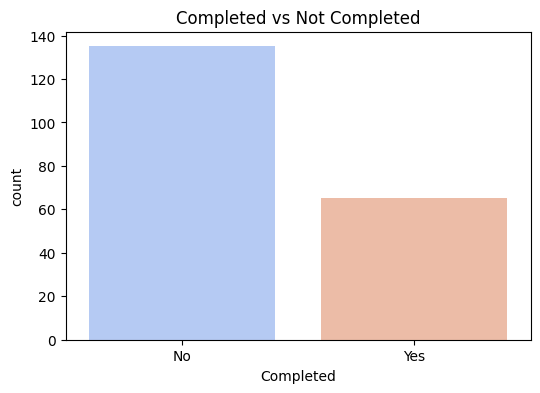

In [2]:
# Basic stats
print(df.info())
print(df['Priority'].value_counts())
print(df['Completed'].value_counts())
print(df['Assigned_To'].value_counts().head(10))

# Plot: Priority distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Priority', data=df, palette='viridis')
plt.title("Priority Distribution")
plt.show()

# Plot: Completed status
plt.figure(figsize=(6,4))
sns.countplot(x='Completed', data=df, palette='coolwarm')
plt.title("Completed vs Not Completed")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

        High       0.00      0.00      0.00        10
         Low       0.50      0.40      0.44        10
      Medium       0.54      0.65      0.59        20

    accuracy                           0.42        40
   macro avg       0.35      0.35      0.35        40
weighted avg       0.40      0.42      0.41        40



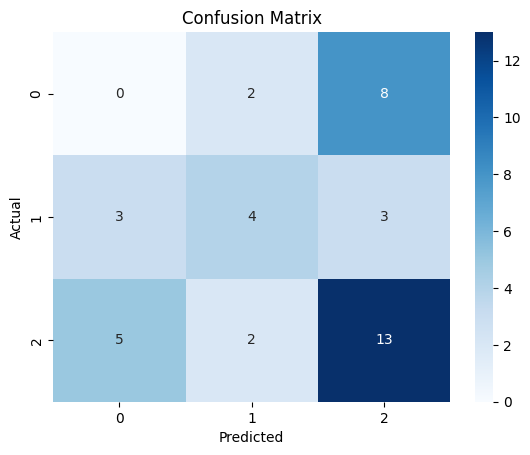

In [3]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Clean text
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

df['Clean_Description'] = df['Description'].apply(clean_text)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Clean_Description'])
y = df['Priority']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Classification Report (Random Forest):

              precision    recall  f1-score   support

        High       0.09      0.10      0.10        10
         Low       0.38      0.30      0.33        10
      Medium       0.62      0.65      0.63        20

    accuracy                           0.42        40
   macro avg       0.36      0.35      0.35        40
weighted avg       0.43      0.42      0.42        40



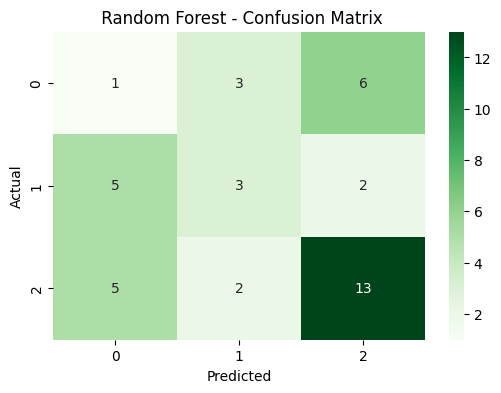

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf.predict(X_test_rf)

# Evaluation Report
print("Classification Report (Random Forest):\n")
print(classification_report(y_test_rf, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_rf, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title(" Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
from datetime import datetime

# Convert Deadline to datetime
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Add Days_Left
df['Days_Left'] = (df['Deadline'] - pd.Timestamp.today()).dt.days

# Binary: Urgent if Days_Left < 5
df['Urgent'] = df['Days_Left'] < 5

# Convert Completed to binary
df['Completed_Binary'] = df['Completed'].map({'Yes': 1, 'No': 0})

# Check updated columns
df[['Description', 'Priority', 'Days_Left', 'Urgent', 'Completed_Binary']].head()


,Description,Priority,Days_Left,Urgent,Completed_Binary
0,Integrate payment gateway,High,17,False,0
1,Integrate payment gateway,Medium,17,False,1
2,Design admin dashboard UI,High,19,False,1
3,Implement caching for API,Medium,18,False,0
4,Add multi-language support,Medium,10,False,1


Combined Model Evaluation:

              precision    recall  f1-score   support

        High       0.18      0.20      0.19        10
         Low       0.44      0.40      0.42        10
      Medium       0.65      0.65      0.65        20

    accuracy                           0.47        40
   macro avg       0.43      0.42      0.42        40
weighted avg       0.48      0.47      0.48        40



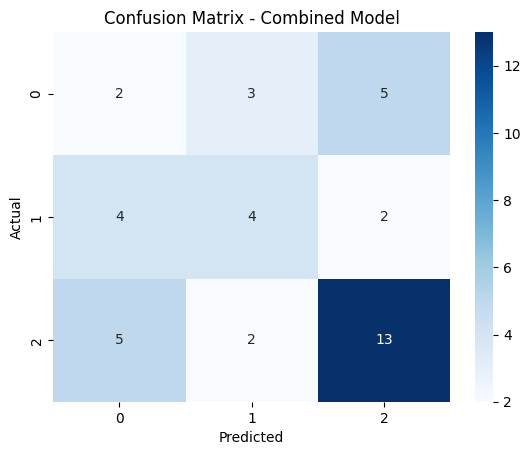

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. TF-IDF on Cleaned Descriptions
tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['Clean_Description'])

# 2. Additional features
X_meta = df[['Days_Left', 'Urgent', 'Completed_Binary']].copy()
scaler = StandardScaler()
X_meta_scaled = scaler.fit_transform(X_meta)

# 3. Combine TF-IDF + Meta
X_combined = hstack([X_text, X_meta_scaled])

# 4. Labels
y_combined = df['Priority']

# 5. Split
X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# 6. Model
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_combined.fit(X_train_cb, y_train_cb)

# 7. Predict & Evaluate
y_pred_cb = rf_combined.predict(X_test_cb)
print("Combined Model Evaluation:\n")
print(classification_report(y_test_cb, y_pred_cb))

sns.heatmap(confusion_matrix(y_test_cb, y_pred_cb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Combined Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


VotingClassifier (RF + LR) Results:

              precision    recall  f1-score   support

        High       0.14      0.20      0.17        10
         Low       0.44      0.40      0.42        10
      Medium       0.65      0.55      0.59        20

    accuracy                           0.42        40
   macro avg       0.41      0.38      0.39        40
weighted avg       0.47      0.42      0.44        40



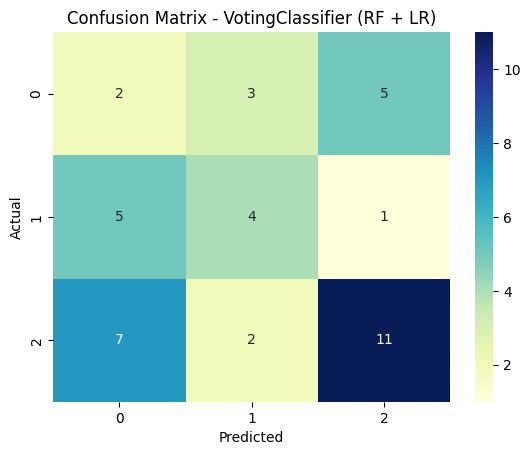

In [7]:
# New Voting Classifier without Naive Bayes
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_lr = LogisticRegression(max_iter=1000)

voting_clf = VotingClassifier(estimators=[
    ('rf', model_rf),
    ('lr', model_lr)
], voting='hard')

# Re-split if not already present
from sklearn.model_selection import train_test_split
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)


# Train and evaluate
voting_clf.fit(X_train_v, y_train_v)
y_pred_v = voting_clf.predict(X_test_v)

print("VotingClassifier (RF + LR) Results:\n")
print(classification_report(y_test_v, y_pred_v))

sns.heatmap(confusion_matrix(y_test_v, y_pred_v), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - VotingClassifier (RF + LR)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
from collections import defaultdict
import random

# Create a copy for assignment
df_assignment = df.copy()

# Get team members list (you can customize)
team_members = ["Kiran", "Sneha", "Rohit", "Aanya"]

# Initialize workload dictionary
workload = {member: 0 for member in team_members}

# Shuffle rows to randomize assignment
df_assignment = df_assignment.sample(frac=1, random_state=42)

# Assign tasks based on priority (High > Medium > Low)
priority_order = ['High', 'Medium', 'Low']
assigned_tasks = []

for priority in priority_order:
    tasks = df_assignment[df_assignment['Priority'] == priority]
    for idx, row in tasks.iterrows():
        # Find member with least load
        assignee = min(workload, key=workload.get)
        workload[assignee] += 1
        df_assignment.at[idx, 'Assigned_To'] = assignee
        assigned_tasks.append((row['Task_ID'], assignee, priority))

# View result
print("Task Assignment Complete!\nWorkload per Member:")
for member, count in workload.items():
    print(f"{member}: {count} tasks")

# Preview assigned DataFrame
df_assignment[['Task_ID', 'Description', 'Priority', 'Assigned_To']].head(10)


Task Assignment Complete!
Workload per Member:
Kiran: 50 tasks
Sneha: 50 tasks
Rohit: 50 tasks
Aanya: 50 tasks


,Task_ID,Description,Priority,Assigned_To
95,96,Handle API rate limits,Low,Sneha
15,16,Implement JWT authentication,High,Kiran
30,31,Add multi-language support,Medium,Rohit
158,159,Fix login bug,High,Sneha
128,129,Fix timezone issues,Medium,Aanya
115,116,Implement JWT authentication,Low,Rohit
69,70,Fix CSS issues on dashboard,Medium,Kiran
170,171,Add pagination to reports,Medium,Sneha
174,175,Fix timezone issues,Low,Aanya
45,46,Migrate database to PostgreSQL,High,Rohit
